### Import Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

/home/sunbeam/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


### Load the data

In [2]:
data = pd.read_csv("Ecommerce Churn Prediction Data.csv")

### EDA

In [3]:
# Display the first few rows of the dataframe
data.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,8411,2023-09-15 12:24:08,Home,298,3,2340,Credit Card,29,1.0,Barbara Patterson,29,Male,1
1,2103,2023-09-15 11:58:54,Electronics,286,4,3561,Credit Card,27,1.0,Brian Roberts,27,Male,0
2,36353,2023-09-15 11:55:25,Books,288,1,3983,Cash,58,0.0,Jean Wood,58,Female,0
3,9806,2023-09-15 11:52:59,Clothing,329,2,1519,PayPal,40,1.0,Rebecca Williams,40,Female,0
4,14198,2023-09-15 11:50:27,Books,95,3,792,PayPal,67,1.0,Heidi Brown,67,Male,0


<Axes: ylabel='count'>

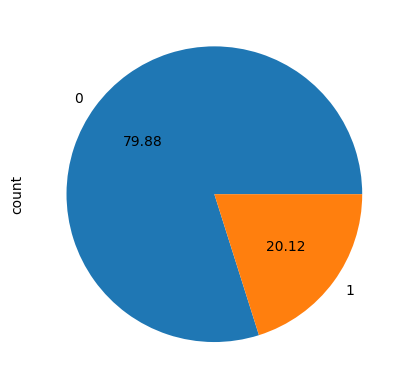

In [4]:
data['Churn'].value_counts().plot.pie(autopct='%.2f')

### Resampling

In [6]:
from sklearn.utils import resample
majority_class = data[data['Churn'] == 0]
minority_class = data[data['Churn'] == 1]

# Undersample the majority class
undersampled_majority = resample(majority_class,replace=False,n_samples=len(minority_class) * 2)

# Combine the undersampled majority class with the minority class
data = pd.concat([undersampled_majority, minority_class])
data

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
34689,48008,2023-03-12 03:02:39,Electronics,221,3,4595,Credit Card,31,NaN,Jill Kelley,31,Female,0
44431,12871,2023-01-18 20:15:55,Books,493,1,5111,PayPal,33,0.0,William Wu,33,Male,0
4044,38873,2023-08-24 07:21:18,Books,56,2,4128,Credit Card,24,0.0,Nancy Morris,24,Female,0
5824,38504,2023-08-14 19:56:14,Electronics,452,5,3131,Credit Card,61,1.0,Elizabeth Wright,61,Female,0
46762,10185,2023-01-06 05:16:53,Books,427,5,563,Credit Card,40,1.0,Angela Weaver,40,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59972,37928,2022-10-25 06:55:22,Books,100,5,4340,Credit Card,43,0.0,Mary Martin,43,Female,1
59988,822,2022-10-25 05:01:15,Books,482,4,588,Credit Card,23,1.0,Anthony Adams,23,Female,1
59991,2875,2022-10-25 04:45:38,Clothing,246,1,4473,PayPal,70,1.0,Shelly Patterson,70,Male,1
59992,28536,2022-10-25 04:32:09,Clothing,146,5,3051,PayPal,43,1.0,Donna Tyler,43,Male,1


<Axes: ylabel='count'>

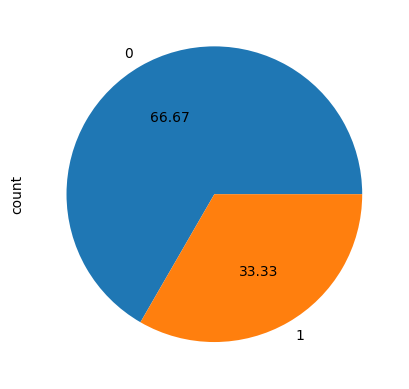

In [7]:
data['Churn'].value_counts().plot.pie(autopct='%.2f')

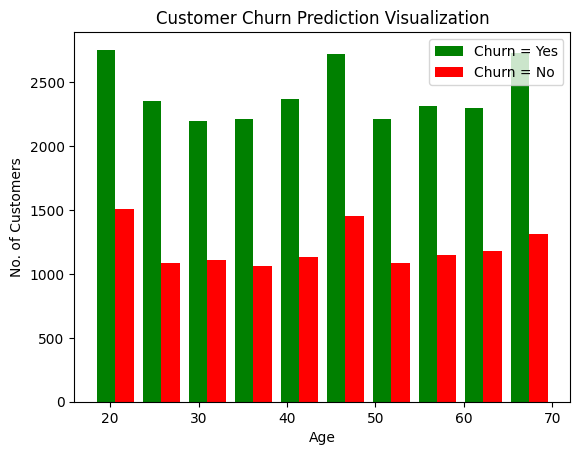

In [8]:
churn_no = data[data.Churn == 0].Age
churn_yes = data[data.Churn == 1].Age
plt.xlabel("Age")
plt.ylabel("No. of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([churn_no, churn_yes], color=['green','red'], label=['Churn = Yes','Churn = No'])
plt.legend()


In [9]:
# Drop duplicate columns
data = data.drop(columns=['Customer Name', 'Customer Age'])

In [10]:
# Handle missing values (if any)
data = data.dropna()

# Convert 'Purchase Date' to datetime format
data['Purchase Date'] = pd.to_datetime(data['Purchase Date'])

# Display basic statistics
data.describe()

,Customer ID,Purchase Date,Product Price,Quantity,Total Purchase Amount,Returns,Age,Churn
count,29391.000000,29391,29391.000000,29391.000000,29391.000000,29391.000000,29391.000000,29391.000000
mean,24940.591372,2023-04-06 09:20:44.703990784,255.857473,2.998639,2732.047259,0.501786,43.895580,0.332891
min,1.000000,2022-10-25 04:06:08,10.000000,1.000000,101.000000,0.000000,18.000000,0.000000
25%,12562.500000,2023-01-16 01:07:13.500000,134.000000,2.000000,1488.000000,0.000000,30.000000,0.000000
50%,24962.000000,2023-04-06 10:00:25,257.000000,3.000000,2721.000000,1.000000,44.000000,0.000000
75%,37352.500000,2023-06-26 17:10:23,377.000000,4.000000,3975.000000,1.000000,57.000000,1.000000
max,49997.000000,2023-09-15 12:24:08,500.000000,5.000000,5350.000000,1.000000,70.000000,1.000000
std,14348.372817,NaN,141.233998,1.408185,1439.737207,0.500005,15.330722,0.471256


In [11]:
# Data preprocessing
from sklearn.preprocessing import LabelEncoder
data['Purchase Date'] = pd.to_datetime(data['Purchase Date'])
label_encoder = LabelEncoder()
data['Product Category'] = label_encoder.fit_transform(data['Product Category'])
data['Payment Method'] = label_encoder.fit_transform(data['Payment Method'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Purchase Month'] = data['Purchase Date'].dt.month
data['Purchase Day'] = data['Purchase Date'].dt.day
data['Purchase DayOfWeek'] = data['Purchase Date'].dt.dayofweek
data = data.drop(columns=['Purchase Date'])

In [12]:
# Display the first few rows of the processed dataframe
data.head()

,Customer ID,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Returns,Age,Gender,Churn,Purchase Month,Purchase Day,Purchase DayOfWeek
44431,12871,0,493,1,5111,3,0.0,33,1,0,1,18,2
4044,38873,0,56,2,4128,1,0.0,24,0,0,8,24,3
5824,38504,2,452,5,3131,1,1.0,61,0,0,8,14,0
46762,10185,0,427,5,563,1,1.0,40,0,0,1,6,4
57876,44066,1,405,1,3764,3,0.0,41,1,0,11,6,6


### Split data into x and y 

In [13]:
# Define features and target variable
X = data.drop(columns=['Churn', 'Customer ID'])
y = data['Churn']

### Split data into train and test

In [14]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Create model

In [15]:
from sklearn.ensemble import RandomForestClassifier
def create_random_forest_model():
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    return rf

In [16]:
models = [(create_random_forest_model(), 'Random Forest')]

### Model evaluation

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
def evaluate_model(model, model_name):
    y_pred = model.predict(X_test)
    y_true = y_test 

    accuracy = accuracy_score(y_true, y_pred)

    precision = precision_score(y_true, y_pred, average='macro')

    recall = recall_score(y_true, y_pred, average='macro')

    f1 = f1_score(y_true, y_pred, average='macro' )

    return model_name, accuracy, precision, recall, f1

In [18]:
evaluate_rows = []
for (model, model_name) in models:
    evaluate_rows.append(evaluate_model(model, model_name))

result = pd.DataFrame(evaluate_rows, columns=['Algorithm','Accuracy','Precision','Recall','F1'])
result

,Algorithm,Accuracy,Precision,Recall,F1
0,Random Forest,0.662017,0.540931,0.504578,0.426385


In [19]:
import pickle

with open('./model.pkl', 'wb') as file:
    pickle.dump(model, file)